## This notebook tests LOS internal consistency for NH facilityfacts files ##

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import scipy.optimize as op
from stats import fullCRVFromPDFModel, CachedCDFGenerator
import tools_util as tu
import pyrheautils as pu

In [2]:
runDesc = '/home/welling/git/pyRHEA_github/src/sim/twoyear_allfac_OC.yaml'
inputDict = tu.readModelInputs(runDesc)
pu.prepPathTranslations(inputDict)
facDict = tu.getFacDict(inputDict)


In [3]:
print facDict['NEWO']['losModel']

OrderedDict([('parms', [0.12004755959256652, 0.610925, 162.329318, 1.352236, 20.559685]), ('pdf', '$0*weibull(k=$1, lmda=$2)+(1-$0)*weibull(k=$3, lmda=$4)'), ('prov', 'nh-fitting-2weibull.R and convert.py 213f4c53 based on OC_Nursing_Home_LOS_Line-Lists_for_RHEA_2.0_-_2011-2015_-_Adult_Only_-_09-29-2017_FINAL_NH_LOS_Line_List.csv')])


In [4]:
xV = []
yV = []
labels = []
for abbrev, rec in facDict.items():
    if rec['category'] == 'NURSINGHOME':
        print abbrev
        losModel = facDict[abbrev]['losModel']
        losCRV = fullCRVFromPDFModel(losModel)
        xV.append(rec['meanLOS']['value'])
        yV.append(losCRV.mean())
        labels.append(abbrev)
        


CSNC
LPAL
MANO
COVI
CVSB
CVLH
PACI
BGSJ
SEAC
ANHC
FLAG
KNOT
EVER
PALM
LAKE
GGCH
STAN
FPCC
GORD
FOCC
HVAL
CARE
SCRT
SNMR
BEAC
VICT
PKVW
VIVA
LHAB
WAEC
TOWN
HELP
EXTW
ROYL
LEIS
ACNC
ALTA
WINA
NSUB
COCT
FREE
PREG
ELIZ
PSUP
CVPL
TERR
PANA
MESA
BPNC
WINF
PVIS
GREE
HVCC
ORRH
EDNA
BVCC
NNRC
BGYL
KINO
CAPO
ATCC
ALAM
WLNT
RGNT
QUAK
NEWO
GPCC


STAN 274.627848101 238.66006684377953 OrderedDict([('parms', [1.0, 0.610925, 162.329318, 1.352236, 20.559685]), ('pdf', '$0*weibull(k=$1, lmda=$2)+(1-$0)*weibull(k=$3, lmda=$4)'), ('prov', 'nh-fitting-2weibull.R and convert.py 213f4c53 based on OC_Nursing_Home_LOS_Line-Lists_for_RHEA_2.0_-_2011-2015_-_Adult_Only_-_09-29-2017_FINAL_NH_LOS_Line_List.csv')])
EXTW 261.225 261.22499997598516 OrderedDict([('parms', [0.41195104324608045, 0.779501, 481.392169, 1.058001, 55.989533]), ('pdf', '$0*weibull(k=$1, lmda=$2)+(1-$0)*weibull(k=$3, lmda=$4)'), ('prov', 'nh-fitting-2weibull.R and convert.py 213f4c53 based on OC_Nursing_Home_LOS_Line-Lists_for_RHEA_2.0_-_2011-2015_-_Adult_Only_-_09-29-2017_FINAL_NH_LOS_Line_List.csv')])


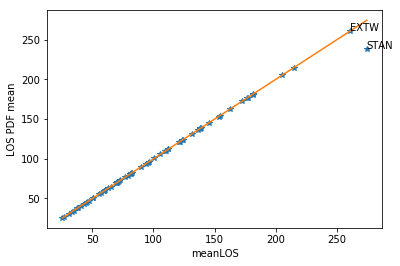

In [5]:
xVV = np.asarray(xV)
yVV = np.asarray(yV)
plt.plot(xVV, yVV, '*')
plt.plot([xVV.min(), xVV.max()], [xVV.min(), xVV.max()], '-')
plt.xlabel('meanLOS')
plt.ylabel('LOS PDF mean')
for x, y, abbrev in zip(xV, yV, labels):
    ratio = x/y
    if ratio < 0.99 or ratio > 1.01 or abbrev in ['EXTW']:
        print abbrev, x, y, facDict[abbrev]['losModel']
        plt.annotate(abbrev, xy=(x, y))
plt.show()

In [6]:
lm = facDict['STAN']['losModel'].copy()
lm['parms'] = lm['parms'][:]  # avoid overwriting
print lm

OrderedDict([('parms', [1.0, 0.610925, 162.329318, 1.352236, 20.559685]), ('pdf', '$0*weibull(k=$1, lmda=$2)+(1-$0)*weibull(k=$3, lmda=$4)'), ('prov', 'nh-fitting-2weibull.R and convert.py 213f4c53 based on OC_Nursing_Home_LOS_Line-Lists_for_RHEA_2.0_-_2011-2015_-_Adult_Only_-_09-29-2017_FINAL_NH_LOS_Line_List.csv')])


In [7]:
lm['parms'][0] = 0.0
print lm
print facDict['STAN']['losModel']

OrderedDict([('parms', [0.0, 0.610925, 162.329318, 1.352236, 20.559685]), ('pdf', '$0*weibull(k=$1, lmda=$2)+(1-$0)*weibull(k=$3, lmda=$4)'), ('prov', 'nh-fitting-2weibull.R and convert.py 213f4c53 based on OC_Nursing_Home_LOS_Line-Lists_for_RHEA_2.0_-_2011-2015_-_Adult_Only_-_09-29-2017_FINAL_NH_LOS_Line_List.csv')])
OrderedDict([('parms', [1.0, 0.610925, 162.329318, 1.352236, 20.559685]), ('pdf', '$0*weibull(k=$1, lmda=$2)+(1-$0)*weibull(k=$3, lmda=$4)'), ('prov', 'nh-fitting-2weibull.R and convert.py 213f4c53 based on OC_Nursing_Home_LOS_Line-Lists_for_RHEA_2.0_-_2011-2015_-_Adult_Only_-_09-29-2017_FINAL_NH_LOS_Line_List.csv')])


In [8]:
print lm

OrderedDict([('parms', [0.0, 0.610925, 162.329318, 1.352236, 20.559685]), ('pdf', '$0*weibull(k=$1, lmda=$2)+(1-$0)*weibull(k=$3, lmda=$4)'), ('prov', 'nh-fitting-2weibull.R and convert.py 213f4c53 based on OC_Nursing_Home_LOS_Line-Lists_for_RHEA_2.0_-_2011-2015_-_Adult_Only_-_09-29-2017_FINAL_NH_LOS_Line_List.csv')])


In [9]:
crv = fullCRVFromPDFModel(facDict['STAN']['losModel'])

In [10]:
print crv.mean()

238.66006684377953


In [11]:
from scipy.stats import weibull_min
print weibull_min(0.610925, scale=162.329318).mean()

238.6600668218514


In [12]:
baseScale = 20.559685
baseK = 1.352236
nonFrailCRV = weibull_min(baseK, scale=baseScale)
print nonFrailCRV.mean()

18.84746779641064


In [13]:
def pltCRV(crv, scale=1.0, label=None, xlim=None):
    mv = crv.mean()
    if xlim is None:
        xV = np.linspace(0.0, round(3*mv), 101)
    else:
        xV = np.linspace(0.0, xlim, 101)
    yV = scale * crv.pdf(xV)
    if label is None:
        plt.plot(xV, yV, '-')
    else:
        plt.plot(xV, yV, '-', label=label)
    plt.plot([mv], [0.0], '*')
    print mv


18.84746779641064
28.271201694615957


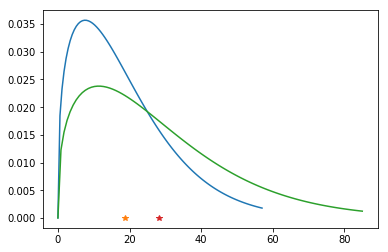

In [14]:
pltCRV(nonFrailCRV)
pltCRV(weibull_min(baseK, scale=1.5*baseScale))
plt.show()

238.6600668218514


/home/welling/myEnv/local/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:1558: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


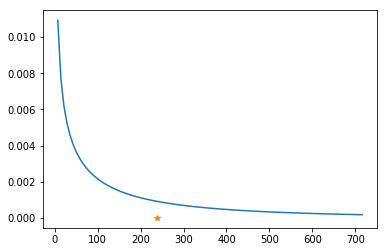

In [15]:
frailCRV = weibull_min(0.610925, scale=162.329318)
pltCRV(frailCRV)
plt.show()

In [16]:
for idx in xrange(10000):
    sv = frailCRV.cdf(float(idx))
    ev = frailCRV.cdf(float(idx+1))
    chance = (ev-sv)/(1.0-sv)
    if np.random.random() < chance:
        print idx, chance


4 0.01508830375577676
15 0.009342795535266187
312 0.00291262265570006
767 0.0020542004986134513
1105 0.001782547689807777
2937 0.0012190816292010779
3351 0.001158156023670854
4061 0.001074776000384853
4068 0.0010740565347172892
4761 0.0010103305499923685
4943 0.0009956996201791188
5663 0.0009444184542132342
7638 0.0008406924416271489
8015 0.0008250876748291171
9083 0.0007859104197896034


In [17]:
import phacsl.utils.formats.csv_tools as csv_tools
keys, recs = csv_tools.parseCSV(pu.pathTranslate('$(MODELDIR)/'
                                                 'OC_Nursing_Home_LOS_Line-Lists_for_RHEA_2.0_-_2011-2015_-_Adult_Only_-_05-21-2019_UPDATE_v2_NH_LOS_Line_List.csv'))
print keys
samps = []
for rec in recs:
    if rec['NH CODE'] == 'NEWO':
        samps.append(rec['RAW LOS (days)'])

[u'NH CODE', u'DISCHARGE/ASSESSMENT YEAR', u'RAW LOS (days)', u'NOT YET DISCHARGED?', u'ADD 45 DAYS?', u'ADJUSTED LOS (days)']


238.6600668218514
18.84746779641064
572.7841603724434
45.23392271138554
[0.12004755959256652, 0.610925, 162.329318, 1.352236, 20.559685]
[0.12004755959256652, 0.610925, 162.329318, 1.352236, 20.559685]
45.235433877991504


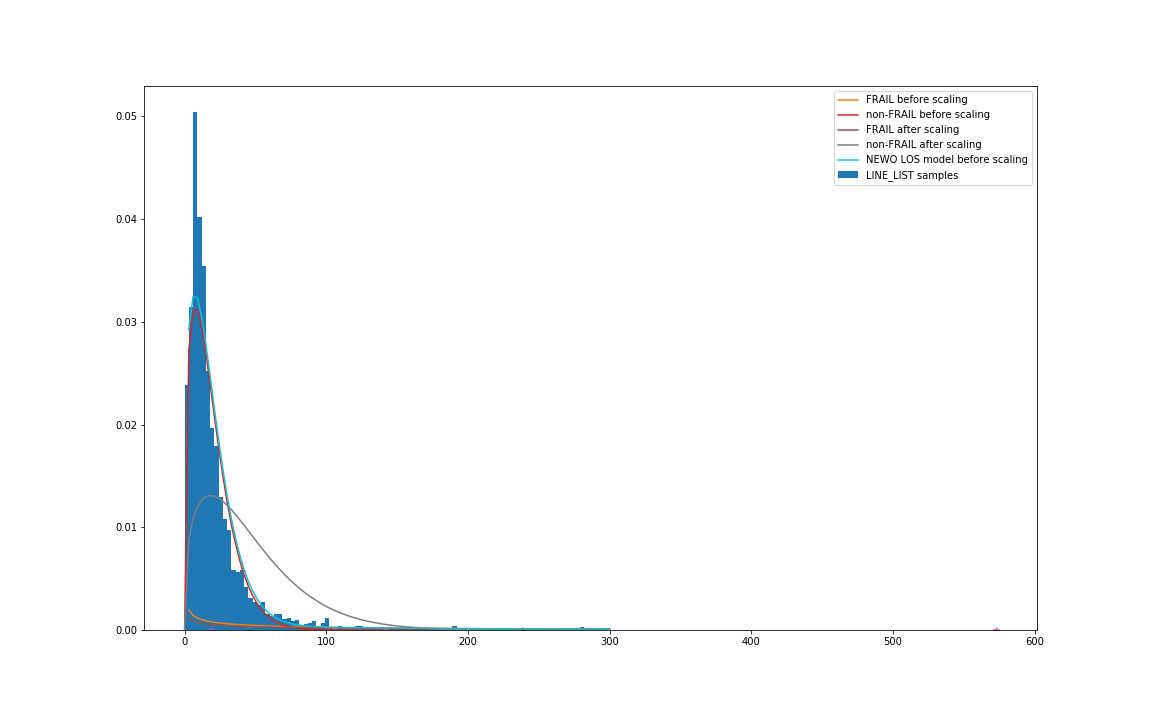

In [18]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
plt.rcParams["figure.figsize"] = [16, 10]

baseScale = 20.559685
baseK = 1.352236
nonFrailCRV = weibull_min(baseK, scale=baseScale)
scaledNonFrailCRV = weibull_min(baseK, scale=2.4*baseScale)

frailScale = 162.329318
frailK = 0.610925
frailCRV = weibull_min(frailK, scale=frailScale)
scaledFrailCRV = weibull_min(frailK, scale=2.4*frailScale)


sampV = np.asarray(samps)
newoLOSModel = facDict['NEWO']['losModel']
newoCRV = fullCRVFromPDFModel(newoLOSModel)
xlim = 300
#xlim = None
plt.hist(sampV, bins=100, range=(0.0, xlim), density=True, label='LINE_LIST samples')
#plt.hist(sampV, bins=100, density=True, label='LINE_LIST samples', log=True)
#pltCRV(newoCRV, label='NEWO scaled LOS', xlim=xlim)
lmda = newoLOSModel['parms'][0]
pltCRV(frailCRV, scale=lmda, label='FRAIL before scaling', xlim=xlim)
pltCRV(nonFrailCRV, scale=1.0-lmda, label='non-FRAIL before scaling', xlim=xlim)
pltCRV(scaledFrailCRV, scale=lmda, label='FRAIL after scaling', xlim=xlim)
pltCRV(scaledNonFrailCRV, scale=1.0-lmda, label='non-FRAIL after scaling', xlim=xlim)

unscaledLOSModel = newoLOSModel.copy()
unscaledLOSModel['parms'] = newoLOSModel['parms'][:]  # avoid overwriting
print unscaledLOSModel['parms']
unscaledLOSModel['parms'][4] = baseScale
unscaledLOSModel['parms'][2] = frailScale
print unscaledLOSModel['parms']
unscaledFullCRV = fullCRVFromPDFModel(unscaledLOSModel)
pltCRV(unscaledFullCRV, label='NEWO LOS model before scaling', xlim=xlim)

plt.legend()
plt.show()

In [19]:
print nonFrailCRV.mean()
print frailCRV.mean()

18.84746779641064
238.6600668218514


In [20]:
samps = []
for idx in range(10):
    samps.append(frailCRV.rvs(100).mean())
print np.asarray(samps).mean()

240.76229706465537


In [21]:
samps = []
for idx in range(10):
    samps.append(nonFrailCRV.rvs(100).sum()/100.0)
print np.asarray(samps).mean()

18.666179702504756


In [22]:
print facDict['NEWO']['losModel']

OrderedDict([('parms', [0.12004755959256652, 0.610925, 162.329318, 1.352236, 20.559685]), ('pdf', '$0*weibull(k=$1, lmda=$2)+(1-$0)*weibull(k=$3, lmda=$4)'), ('prov', 'nh-fitting-2weibull.R and convert.py 213f4c53 based on OC_Nursing_Home_LOS_Line-Lists_for_RHEA_2.0_-_2011-2015_-_Adult_Only_-_09-29-2017_FINAL_NH_LOS_Line_List.csv')])


In [23]:
import cPickle as pickle
with open('/home/welling/git/pyRHEA_github/src/sim/tmp.pkl', 'rU') as f:
    sampBins, sampCounts = pickle.load(f)
print sampBins
print sampCounts
ctSum = float(sum(sampCounts))
scaledCounts = [float(ct)/ctSum for ct in sampCounts]
print scaledCounts

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 65.0, 69.0, 70.0, 71.0, 73.0, 74.0, 75.0, 78.0, 79.0, 81.0, 83.0, 88.0, 89.0, 91.0, 92.0, 97.0, 100.0, 103.0, 104.0, 105.0, 108.0, 110.0, 115.0, 124.0, 125.0, 130.0, 131.0, 137.0, 138.0, 140.0, 142.0, 143.0, 144.0, 145.0, 146.0, 150.0, 152.0, 153.0, 158.0, 160.0, 178.0, 182.0, 183.0, 184.0, 194.0, 196.0, 204.0, 207.0, 215.0, 224.0, 231.0, 238.0, 290.0, 303.0]
[33, 38, 50, 44, 28, 34, 32, 37, 39, 25, 25, 27, 21, 28, 29, 20, 28, 18, 17, 8, 14, 12, 19, 7, 17, 12, 16, 14, 15, 4, 8, 8, 11, 3, 13, 13, 1, 6, 5, 5, 5, 9, 1, 5, 4, 4, 1, 1, 4, 2, 2, 1, 5, 2, 3, 6, 2, 1, 1, 3, 3, 1, 4, 3, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 

In [24]:
wtSum = 0.0
for x, ct in zip(sampBins, sampCounts):
    wtSum += x * ct
print wtSum/ctSum

25.7573131094


45.235433877991504


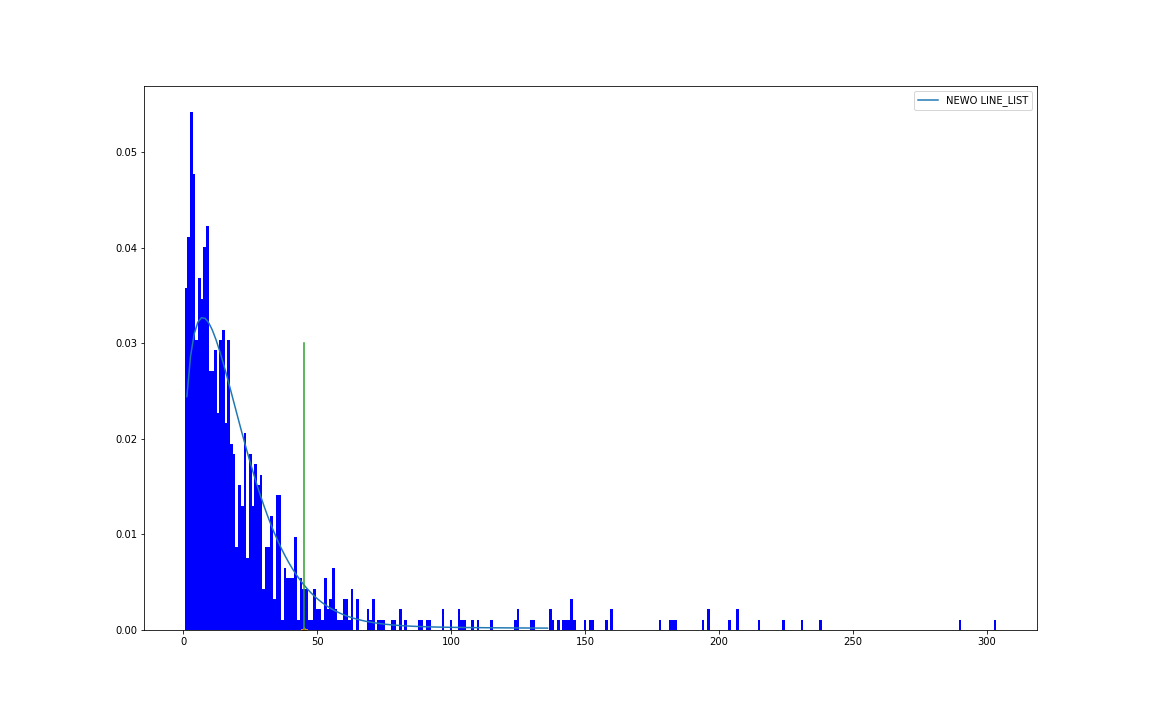

In [25]:
newoCRV = fullCRVFromPDFModel(facDict['NEWO']['losModel'])
#plt.hist(sampV, bins=100, range=(0,300), density=True, label='double Weibull CRV')
pltCRV(newoCRV, label='NEWO LINE_LIST')
meanLOS = facDict['NEWO']['meanLOS']['value']
plt.plot((meanLOS, meanLOS), (0.0, 0.03), '-')
rects = plt.bar(sampBins, scaledCounts, width=1.0,  color='b')

plt.legend()
plt.show()

280.11114318114613 patients remain
45.235433877991504


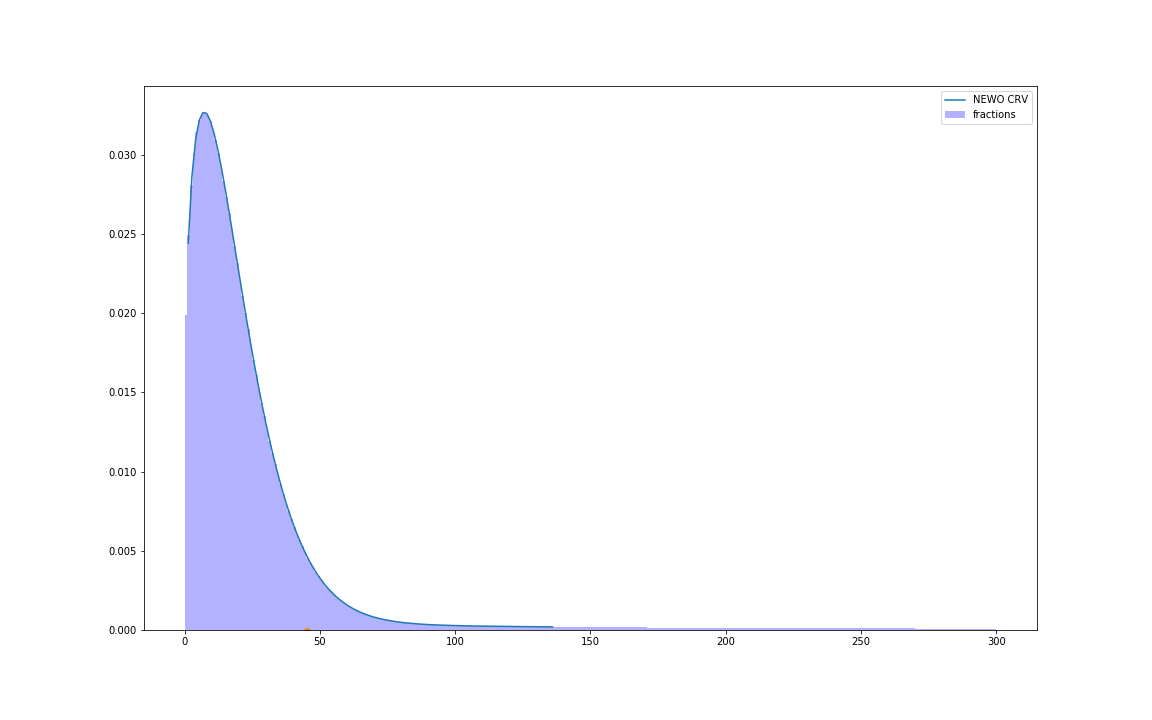

0.0023853289482482767


In [26]:
cG = CachedCDFGenerator(newoCRV)
totPatients = 10000.0
nPatients = totPatients
low = 0.0
tripleL = []
while low < 300.0:
    high = low + 1.0
    drop = cG.intervalProb(low, high) * nPatients
    tripleL.append((low, high, drop))
    nPatients -= drop
    low += 1.0
print '%s patients remain' % nPatients


synthBins = []
synthCts = []
for low, high, drop in tripleL:
    synthBins.append(0.5*(low + high))
    synthCts.append(drop/totPatients)
rects = plt.bar(synthBins, synthCts, width=1.0,  color='b', label='fractions', alpha=0.3)
pltCRV(newoCRV, label='NEWO CRV')
plt.legend()
plt.show()
print sum([a*b for a, b in zip(synthBins, synthCts)])/totPatients


In [27]:
df = pd.read_msgpack('/home/welling/git/pyRHEA_github/src/sim/cdf_intervalprob_results.mpz')
df.columns

Index([u'start', u'end', u'rslt', u'tier', u'abbrev'], dtype='object')

34558


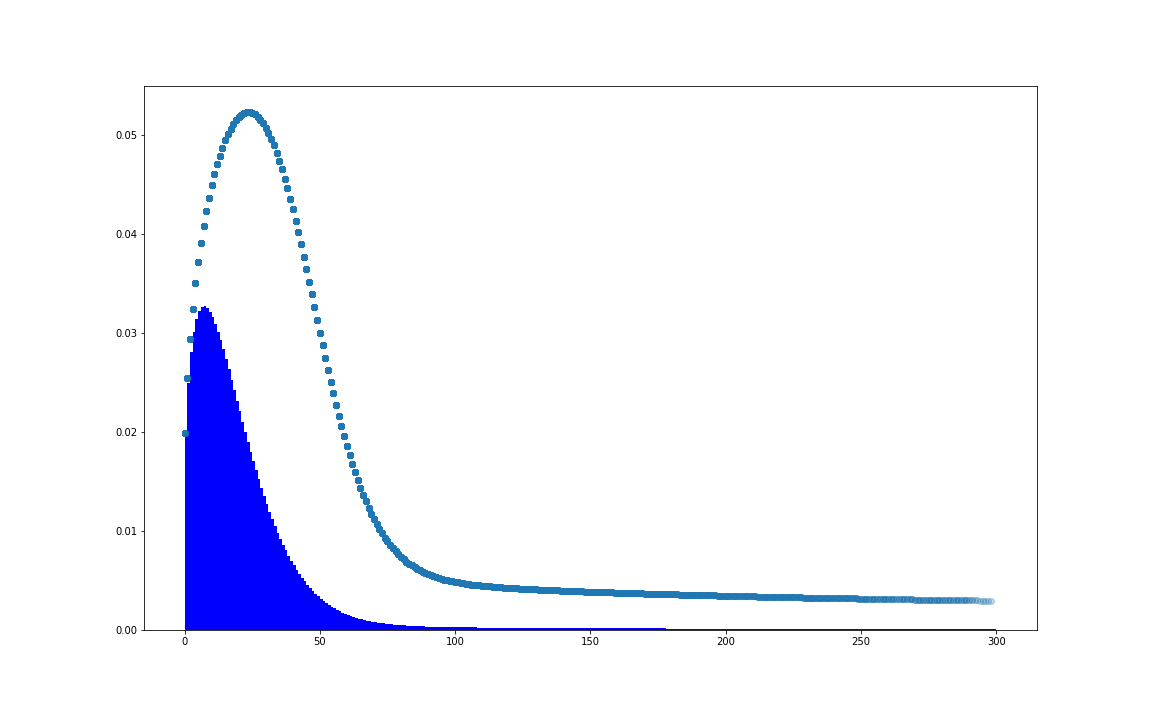

In [28]:
newoDF = df[df.abbrev == 'NEWO']
print newoDF['abbrev'].count()
xL = []
yL = []
for row in xrange(newoDF['abbrev'].count()):
    ser = newoDF.iloc[row]
    xL.append(ser['start'])
    yL.append(ser['rslt'])
plt.plot(xL, yL, 'o', alpha=0.1)
rects = plt.bar(synthBins, synthCts, width=1.0,  color='b', label='fractions')

plt.show()


In [29]:
uniqueDF = newoDF.drop_duplicates(subset=['start', 'end', 'abbrev'])
uniqueDF.columns
all(uniqueDF['end'] - uniqueDF['start'] == 1)
#uniqueDF['dt'] = (uniqueDF['end'] - uniqueDF['start']).copy()
#uniqueDF['dt'] == 1

True

In [30]:
vL = []
wt = 1.0
for idx, row in uniqueDF.iterrows():
    frac = row['rslt']
    wt *= (1.0-frac)
    vL.append(wt)
uniqueDF['accumwt'] = np.asarray(vL)
#uniqueDF

/home/welling/myEnv/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


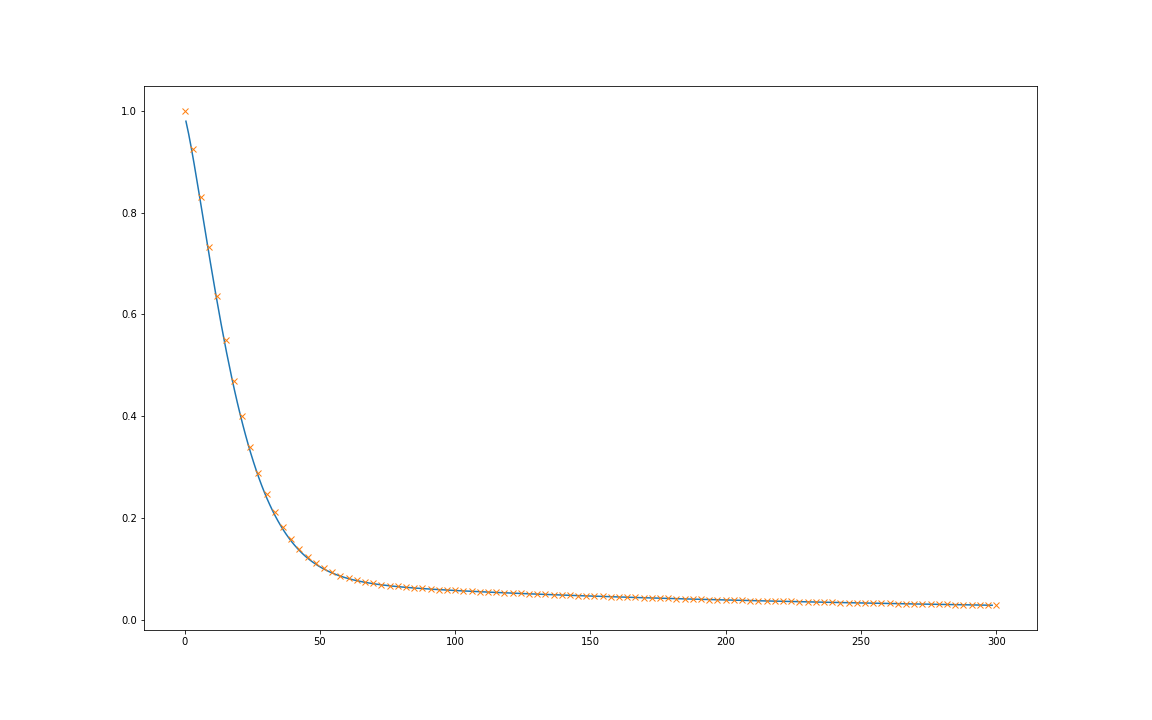

In [31]:
plt.plot(0.5*(uniqueDF['start']+uniqueDF['end']), uniqueDF['accumwt'])
xV = np.linspace(0.0, 300.0, 100)
yV = 1.0 - newoCRV.cdf(xV)
plt.plot(xV, yV, 'x')
plt.show()

In [32]:
lst = [(x, y) for x, y in zip(xL, yL)]
lst.sort()
print lst[:10]

[(0, 0.019872142284515216), (0, 0.019872142284515216), (0.0, 0.019872142284515216), (0, 0.019872142284515216), (0, 0.019872142284515216), (0.0, 0.019872142284515216), (0.0, 0.019872142284515216), (0, 0.019872142284515216), (0, 0.019872142284515216), (0, 0.019872142284515216)]


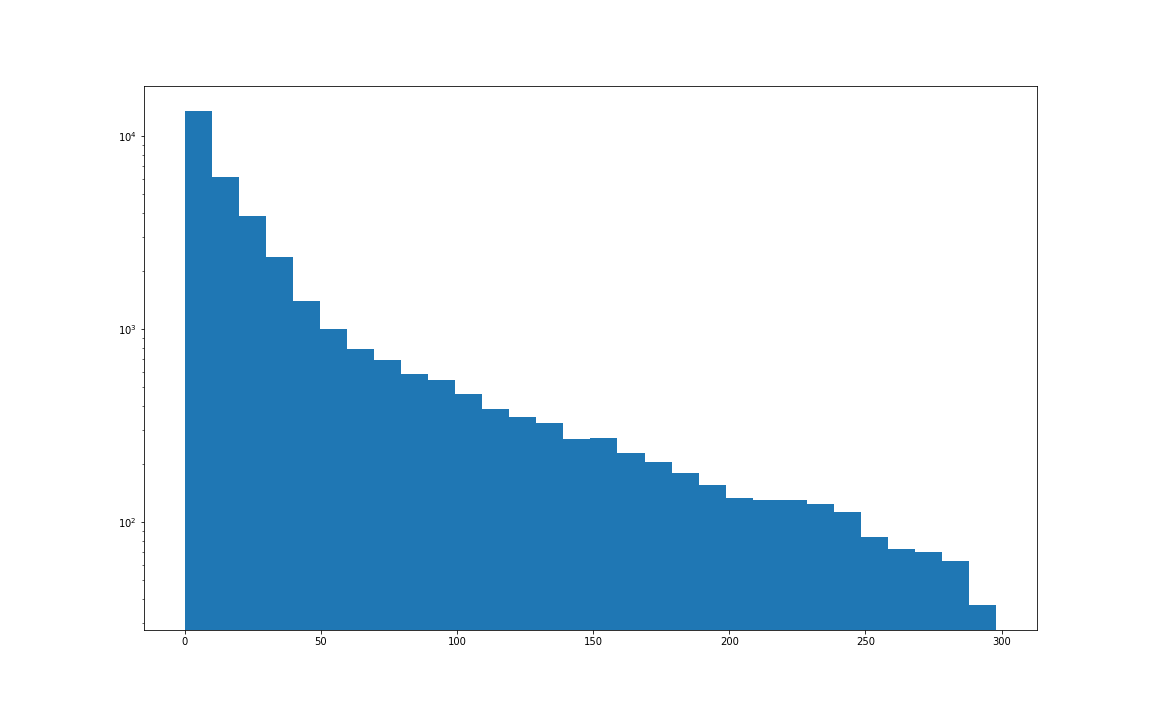

In [33]:
plt.hist([a for a,b in lst], bins=30, log=True)
plt.show()

In [34]:
oldDS = pd.read_csv(pu.pathTranslate('$(MODELDIR)/OC_Nursing_Home_LOS_Line-Lists_for_RHEA_2.0_-_2011-2015_-_Adult_Only_-_09-29-2017_FINAL_NH_LOS_Line_List.csv'))

In [35]:
newDS = pd.read_csv(pu.pathTranslate('$(MODELDIR)/OC_Nursing_Home_LOS_Line-Lists_for_RHEA_2.0_-_2011-2015_-_Adult_Only_-_05-21-2019_UPDATE_v2_NH_LOS_Line_List.csv'))

In [36]:
oldDS.columns

Index([u'CODE', u'LOS', u'DISCHARGE YEAR'], dtype='object')

In [37]:
newDS.columns

Index([u'NH CODE', u'DISCHARGE/ASSESSMENT YEAR', u'RAW LOS (days)',
       u'NOT YET DISCHARGED?', u'ADD 45 DAYS?', u'ADJUSTED LOS (days)'],
      dtype='object')

In [38]:
newDS[(newDS['NH CODE'] == 'NEWO') & (newDS['DISCHARGE/ASSESSMENT YEAR']==2014) & newDS['NOT YET DISCHARGED?'].notna()]

,NH CODE,DISCHARGE/ASSESSMENT YEAR,RAW LOS (days),NOT YET DISCHARGED?,ADD 45 DAYS?,ADJUSTED LOS (days)
83640,NEWO,2014,2423,X,X,2468
83648,NEWO,2014,1,X,X,46
83686,NEWO,2014,8,X,X,53
83690,NEWO,2014,8,X,X,53
83702,NEWO,2014,8,X,X,53
83722,NEWO,2014,1,X,X,46
83723,NEWO,2014,1,X,X,46
83785,NEWO,2014,1,X,X,46
83895,NEWO,2014,33,X,X,78
83933,NEWO,2014,1,X,X,46


In [39]:
print newDS[newDS['NH CODE'] == 'NEWO'].columns
subDS = newDS[newDS['NH CODE'] == 'NEWO']
subDS[subDS['NOT YET DISCHARGED?'] == 'X']

Index([u'NH CODE', u'DISCHARGE/ASSESSMENT YEAR', u'RAW LOS (days)',
       u'NOT YET DISCHARGED?', u'ADD 45 DAYS?', u'ADJUSTED LOS (days)'],
      dtype='object')


,NH CODE,DISCHARGE/ASSESSMENT YEAR,RAW LOS (days),NOT YET DISCHARGED?,ADD 45 DAYS?,ADJUSTED LOS (days)
83638,NEWO,2015,460,X,NaN,460
83639,NEWO,2015,5229,X,NaN,5229
83640,NEWO,2014,2423,X,X,2468
83646,NEWO,2011,1,X,X,46
83648,NEWO,2014,1,X,X,46
83660,NEWO,2011,7,X,X,52
83673,NEWO,2015,1165,X,NaN,1165
83680,NEWO,2015,10,X,NaN,10
83686,NEWO,2014,8,X,X,53
83690,NEWO,2014,8,X,X,53


In [40]:
oldCtDS = oldDS.groupby(['CODE', 'DISCHARGE YEAR']).count()
oldCtDS

LOS
CODE DISCHARGE YEAR     
ACNC 2011            163
     2012            211
     2013            188
     2014            197
     2015            195
ALAM 2011            624
     2012            752
     2013            769
     2014            869
     2015            890
ALTA 2011            428
     2012            409
     2013            404
     2014            404
     2015            443
ANHC 2011            722
     2012            795
     2013            910
     2014            722
     2015            528
ATCC 2011            598
     2012            554
     2013            656
     2014            607
     2015            694
BEAC 2011            654
     2012            680
     2013            630
     2014            620
     2015            656
...                  ...
VICT 2011            450
     2012            409
     2013            367
     2014            430
     2015            442
VIVA 2011            420
     2012            622
     2013            535
     2014            509
     2015            425
WAEC 2011            389
     2012            413
     2013            443
     2014            481
     2015            414
WINA 2011            556
     2012            414
     2013            399
     2014            533
     2015            518
WINF 2011            361
     2012            362
     2013            440
     2014            694
     2015            725
WLNT 2011            312
     2012            490
     2013            551
     2014            646
     2015            651

[353 rows x 1 columns]

In [41]:
dischargeDS = oldCtDS.groupby('CODE').mean().rename(columns={'LOS':'OLD DISCH MEAN'})
dischargeDS

,OLD DISCH MEAN
CODE,
ACNC,190.800000
ALAM,780.800000
ALTA,417.600000
ANHC,735.400000
ATCC,621.800000
BEAC,648.000000
BGSJ,425.600000
BGYL,469.800000
BPNC,450.800000


In [42]:
print newDS.columns
newNotDischDS = newDS.dropna().groupby(['NH CODE', 'YEAR']).count().groupby('NH CODE').mean()


Index([u'NH CODE', u'DISCHARGE/ASSESSMENT YEAR', u'RAW LOS (days)',
       u'NOT YET DISCHARGED?', u'ADD 45 DAYS?', u'ADJUSTED LOS (days)'],
      dtype='object')


KeyError: 'YEAR'

In [ ]:
dischargeDS = dischargeDS.join(newNotDischDS, how='left').drop(columns=['LOS (days)'])


In [ ]:
print newDS.columns
print dischargeDS.columns
newDischCtDS = newDS[newDS['Not yet discharged?'].isna()].drop(columns=['Not yet discharged?']).groupby(['NH CODE', 'YEAR']).count().groupby(['NH CODE']).mean()

#dischargeDS = dischargeDS.join(newDischCtDS, how='left')
print dischargeDS.columns
dischargeDS = dischargeDS.rename(columns={'LOS (days)': 'NEW DISCH MEAN'})
dischargeDS

In [ ]:
print facDict['NEWO'].keys()
print facDict['NEWO']['meanLOS']
print 365.0*(facDict['NEWO']['meanPop']['value']/facDict['NEWO']['totalAdmissions']['value'])

In [ ]:
dischargeDS = dischargeDS.reset_index()

In [ ]:
def myFun(row):
    abbrev = row['CODE']
    if abbrev in facDict:
        return facDict[abbrev]['totalAdmissions']['value']
    else:
        return np.NaN
dischargeDS['totalAdmissions'] = dischargeDS.apply(myFun, axis=1)
dischargeDS

In [ ]:
def myFun(row):
    abbrev = row['CODE']
    if abbrev in facDict:
        return facDict[abbrev]['totalDischarges']['value']
    else:
        return np.NaN
dischargeDS['totalDischarges'] = dischargeDS.apply(myFun, axis=1)
dischargeDS

In [ ]:
def myFun(row):
    abbrev = row['CODE']
    if abbrev in facDict:
        return facDict[abbrev]['meanPop']['value']
    else:
        return np.NaN
dischargeDS['meanPop'] = dischargeDS.apply(myFun, axis=1)
dischargeDS

In [ ]:
newDF = newDS
oldDF = oldDS

In [ ]:
plt.hist(newDF['LOS (days)'], bins=300, log=True, label='include')
plt.hist(newDF[newDF['Not yet discharged?'].isna()]['LOS (days)'], bins=300, log=True, label='exclude')
plt.hist(oldDF['LOS'], bins=300, log=True, label='old')
plt.legend()
plt.show()

In [ ]:
plt.hist(newDF['LOS (days)'], bins=300, label='include', range=(0,300))
#plt.hist(oldDF['LOS'], bins=300, label='old', range=(0,300))
plt.hist(newDF[newDF['Not yet discharged?'].isna()]['LOS (days)'], bins=300, label='exclude', range=(0, 300))
plt.xlim(0, 300)
plt.legend()
plt.show()

In [ ]:
df = newDF[newDS['Not yet discharged?'].isna()].drop(columns=['Not yet discharged?', 'YEAR']).groupby(['NH CODE']).mean()

df = df.rename(columns={'LOS (days)':'New mean LOS'})
losDF = df.copy()
df = oldDF.drop(columns='DISCHARGE YEAR').groupby(['CODE']).mean()
losDF = losDF.join(df, how='left')
losDF = losDF.rename(columns={'LOS':'Old mean LOS'})

def myFun(row):
    abbrev = row.name
    if abbrev in facDict:
        return facDict[abbrev]['meanLOS']['value']
    else:
        return np.NaN
ser = losDF.apply(myFun, axis=1)
losDF['LOS from props'] = ser
losDF

In [ ]:
plt.plot(losDF['New mean LOS'], losDF['LOS from props'], 'o')
plt.plot((0.0, 300.0), (0.0, 300.0))
plt.show()

In [ ]:
print newDS.columns
newDS.head()

In [ ]:
newDS['COUNTME'] = 1

In [ ]:
rawCountDF = newDS[['NH CODE', 'DISCHARGE/ASSESSMENT YEAR', 'COUNTME']].groupby(['NH CODE', 'DISCHARGE/ASSESSMENT YEAR']).count()
rawCountDF = rawCountDF.reset_index()

In [ ]:
rawCountDF[rawCountDF['NH CODE'] == 'NEWO']

In [ ]:
nydCountDF = newDS[['NH CODE', 'DISCHARGE/ASSESSMENT YEAR', 'NOT YET DISCHARGED?']].groupby(['NH CODE', 'DISCHARGE/ASSESSMENT YEAR']).count()
nydCountDF = nydCountDF.reset_index()

In [ ]:
nydCountDF[nydCountDF['NH CODE'] == 'NEWO']

In [ ]:
adCountDF = newDS[['NH CODE', 'DISCHARGE/ASSESSMENT YEAR', 'ADD 45 DAYS?']].groupby(['NH CODE', 'DISCHARGE/ASSESSMENT YEAR']).count()
adCountDF = adCountDF.reset_index()

In [ ]:
adCountDF[adCountDF['NH CODE'] == 'NEWO']

In [ ]:
countsDF = rawCountDF.copy().rename(columns={'COUNTME':'TOTAL RECS'})
countsDF['NOT YET DISCHARGED?'] = nydCountDF['NOT YET DISCHARGED?']
countsDF['ADD 45 DAYS?'] = adCountDF['ADD 45 DAYS?']
countsDF['NH CODE'] = countsDF['NH CODE'].astype('category')
countsDF['FRAC LOST DISCHARGES'] = countsDF['ADD 45 DAYS?'].astype(np.float32)/countsDF['TOTAL RECS'].astype(np.float32)

In [ ]:
countsDF[countsDF['NH CODE'] == 'NEWO']

In [ ]:
countsDF.dtypes

In [ ]:
sumsDF = countsDF.groupby(['NH CODE']).sum().drop(columns=['DISCHARGE/ASSESSMENT YEAR', 'FRAC LOST DISCHARGES']).reset_index()

sumsDF['FRAC LOST DISCHARGES'] = sumsDF['ADD 45 DAYS?'].astype(np.float32)/sumsDF['TOTAL RECS'].astype(np.float32)

In [ ]:
sumsDF[sumsDF['NH CODE'] == 'NEWO']

In [ ]:
print 'min: ', sumsDF['FRAC LOST DISCHARGES'].min()
print 'median: ', sumsDF['FRAC LOST DISCHARGES'].median()
print 'mean: ', sumsDF['FRAC LOST DISCHARGES'].mean()
print 'max: ', sumsDF['FRAC LOST DISCHARGES'].max()
